In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-77.1990064650114 -178.9967228566573
-39.32077790327072 117.48340616523564
23.5335140512814 56.85150707919175
61.2350323775201 -162.64651256644143
-33.0820246082702 -112.93367708475215
-62.22736197980238 -92.60924910939126
49.42027042071555 67.0474866690885
-59.46911272769968 -60.80512128449419
23.54989318671089 56.65750936821348
21.069529628254216 -29.398287057347716
-56.29224597807854 -31.818928709125657
45.27064733968831 -27.82710341691495
8.09583418046428 24.142788039710382
-22.215525301090523 88.63115710489762
46.01006353061592 95.40574198051274
-10.47616578491754 -80.91738946784479
20.28508572198713 85.29306240091802
55.49877669121926 -113.05849738821567
55.64652426238635 87.9666788332728
27.563731953326 136.57743487546497
34.78548884740309 51.3919234882477
-51.59134855848922 92.57143240960119
42.6128084871369 20.069367523799343
3.427612294545156 -85.34720294906472
7.894239808850074 91.43134088034844
13.097935392887734 -88.92589063670897
-83.1249177950381 -49.66734757059649
65.94

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
import requests
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the citites in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities. 
    try:
        # Parse the JSON and retrieve data. 
        city_weather = requests.get(city_url).json()
        # Parse out what we need. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city info into city_data
        city_data.append({"City": city.title(),
        "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity,
        "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})
    
    # If an error is experienced, skip the city. 
    except:
        print("City not found. Skipping...")
        pass 
    
# Indicate the Data Loading is complete. 
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | nizwa
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | zhezkazgan
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | raga
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | chimbote
Processing Record 16 of Set 1 | kantilo
Processing Record 17 of Set 1 | athabasca
Processing Record 18 of Set 1 | berikulskiy
City not found. Skipping...
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | qom
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | pec
Processing Record 23 of Set 1 | burica
City 

In [11]:
len(city_data)

559

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,83,75,13.80,TO,2022-07-23 03:20:20
1,Albany,42.6001,-73.9662,76.78,82,65,3.69,US,2022-07-23 03:19:41
2,Nizwa,22.9333,57.5333,84.69,67,87,2.39,OM,2022-07-23 03:23:29
3,Bethel,41.3712,-73.4140,76.62,89,0,0.00,US,2022-07-23 03:23:29
4,Rikitea,-23.1203,-134.9692,72.88,73,16,9.69,PF,2022-07-23 03:20:10
5,Punta Arenas,-53.1500,-70.9167,32.11,80,0,11.50,CL,2022-07-23 03:20:16
6,Zhezkazgan,47.8043,67.7144,76.98,25,0,8.95,KZ,2022-07-23 03:23:29
7,Ushuaia,-54.8000,-68.3000,35.26,87,40,17.27,AR,2022-07-23 03:19:56
8,Ponta Do Sol,32.6667,-17.1000,70.72,65,12,4.97,PT,2022-07-23 03:23:30
9,Chuy,-33.6971,-53.4616,56.39,96,100,4.92,UY,2022-07-23 03:23:30


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-23 03:20:20,-21.2000,-175.2000,75.36,83,75,13.80
1,Albany,US,2022-07-23 03:19:41,42.6001,-73.9662,76.78,82,65,3.69
2,Nizwa,OM,2022-07-23 03:23:29,22.9333,57.5333,84.69,67,87,2.39
3,Bethel,US,2022-07-23 03:23:29,41.3712,-73.4140,76.62,89,0,0.00
4,Rikitea,PF,2022-07-23 03:20:10,-23.1203,-134.9692,72.88,73,16,9.69
5,Punta Arenas,CL,2022-07-23 03:20:16,-53.1500,-70.9167,32.11,80,0,11.50
6,Zhezkazgan,KZ,2022-07-23 03:23:29,47.8043,67.7144,76.98,25,0,8.95
7,Ushuaia,AR,2022-07-23 03:19:56,-54.8000,-68.3000,35.26,87,40,17.27
8,Ponta Do Sol,PT,2022-07-23 03:23:30,32.6667,-17.1000,70.72,65,12,4.97
9,Chuy,UY,2022-07-23 03:23:30,-33.6971,-53.4616,56.39,96,100,4.92


In [15]:
# Create the output file(CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

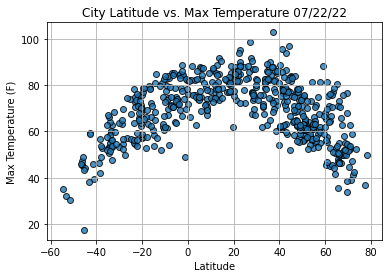

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

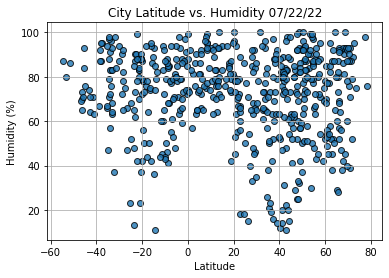

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

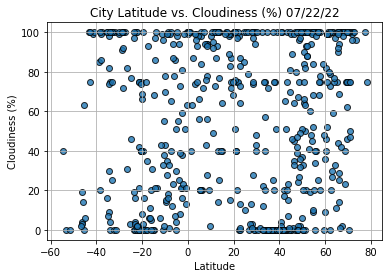

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

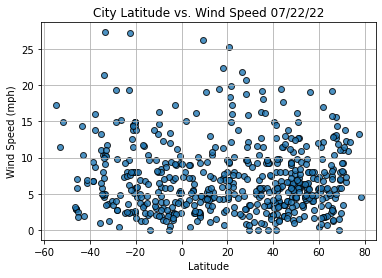

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()